# Práctica de Machine Learning

En este notebook realizaré el analisis de un dataset de Airbnb.


In [1]:
# Primero cargamos librerías y funciones necesarias.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_regression, mutual_info_regression

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Ahora cargaré el Dataframe

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

In [3]:
### Veo las columnas con una breve descripción y analizo cuales voy a quitar ya que no servirán para mi análisis.

print(full_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

## Comienzo el preprocesado de los datos

 El analisis lo haré solamente de Madrid, por lo que realizare un filtro para quedarme solo con lo necesario.

In [4]:
# Primero analizo los NAs de City.

full_df['City'].isna().value_counts()

City
False    14774
True         6
Name: count, dtype: int64

In [5]:
# Vemos como los 6 NAs son de madrid.

na_values = full_df.loc[full_df['City'].isna(), ['City', 'Neighbourhood','Neighbourhood Cleansed']]
na_values

,City,Neighbourhood,Neighbourhood Cleansed
1279,NaN,NaN,Ciudad Universitaria
5776,NaN,NaN,Ciudad Universitaria
9072,NaN,NaN,Ciudad Universitaria
10878,NaN,Cortes,Cortes
14196,NaN,NaN,Ciudad Universitaria
14620,NaN,Arapiles,Vallehermoso


In [6]:
# Convierto los nulos a Madrid

full_df['City'] = full_df['City'].fillna('Madrid')
full_df['City'].isna().sum()

0

In [7]:
full_df['City'].unique()

array(['Austin', 'Barcelona', 'Amsterdam', 'Antwerpen', 'Paris',
       'Alcúdia', 'Madrid', '马德里', 'Madrid, Comunidad de Madrid, ES',
       'Salerno', 'Pozuelo de Alarcón', 'Manacor', 'Felanitx',
       'Portals Nous', 'Andratx', 'Santa Maria del Camí',
       'Port de Pollença', 'West Hollywood', 'London', 'Londres',
       'Pasadena', 'Búger', 'Brooklyn', 'New York', 'Dublin', 'Edinburgh',
       'Roma', 'Bruxelles', 'Hospitalet de Llobregat', 'Washington',
       'Athina', 'Saint-Josse-ten-Noode', 'Greater London', 'Campos',
       'Llucmajor', 'Muro', 'Manchester', 'Palma de Mallorca', 'Pina',
       'Inca', 'Mancor de la Vall', 'Illes Balears', 'Selva',
       'Los Angeles', 'København', 'Woolloomooloo', 'Palma',
       'Colònia de Sant Jordi', 'North Sydney', 'Madri', 'Sóller',
       'Seattle', 'Athens', 'Berlin', 'Frederiksberg', 'Pina, Mallorca',
       'Valldemossa', 'Pollensa', 'Puerto ALCUDIA', "Port d'Andratx",
       'Peguera, Calvià', 'Torrenova', 'Deià',
       'Sant 

In [8]:
# Compruebo que City = San Fernando no pertenece a Madrid.

san_fernando = full_df[full_df['City'].str.contains('San Fernando', case=False)]

san_fernando[['City','Smart Location','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed']]


,City,Smart Location,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
6854,San Fernando,"San Fernando, CA",NaN,San Fernando,NaN
10033,San Fernando de Henares,"San Fernando de Henares, Spain",NaN,Casco Histórico de Vicálvaro,Vicálvaro
14747,San Fernando de Henares,"San Fernando de Henares, Spain",NaN,Casco Histórico de Vicálvaro,Vicálvaro


In [9]:
# Realizo un filtrado por Madrid y sus diferentes tipografías y elimino la columna City. (He traducido las letras chinas en Google Traductor y resulta que significa Madrid)

madrid_df = full_df[full_df['City'].str.contains('madrid|Madrid|马德里|Pozuelo|馬德里|Boadilla|Delicias|las matas|Madid|La Elipa|Aravaca|Ventas|Chueca|de Henares|Vallecas|MADRID|Centro|verde bajo|Aravaca', case=False)]
madrid_df

madrid_df = madrid_df.drop(['City'], axis=1)

# Según el análisis procedo a quitar columnas no necesarias con referencia:

1. Las que poseen ID, URLs, fotos.
2. Las que tienen informacion redundante para mi analisis como el nombre, summary, scraped, notas y las descripciones del propietario.
3. Las que poseen la palabra HOST voy a eliminar las que considero que tampoco sirven para este análisis.


In [10]:
# 1, 2 y 3. Comenzamos a eliminar las columnas anteriormente mencionadas.

madrid_df = madrid_df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview'
             , 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL'
             , 'Host Response Time', 'Host Response Rate', 'Host Name', 'Host Since', 'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Thumbnail Url', 'Host Picture Url'
             , 'Host Location','Host Neighbourhood','Host Listings Count', 'Host Total Listings Count', 'Host Verifications'], axis=1)
             

4. Elimio las características que poseen muy pocos datos, que tiene muchos nulos
   (Square Feet, Weekly Price, Monthly Price, Has Availability, License, Jurisdiction Names).
5. Elimino las columnas que hacen referencia a la localización y de geolocalización, ya que solo hare el analisis de Madrid.


In [11]:
# 4 y 5 elimino las columnas anteriormente mencionadas.

madrid_df = madrid_df.drop(['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Square Feet'
             , 'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped' , 'First Review', 'Last Review'
             , 'License', 'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features'], axis=1)

In [12]:
### Vemos como queda inicialmente mi dataframe para proceder a analizar Madrid.

print(madrid_df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 8769 non-null   object 
 1   Neighbourhood Cleansed        13323 non-null  object 
 2   Neighbourhood Group Cleansed  13323 non-null  object 
 3   Property Type                 13323 non-null  object 
 4   Room Type                     13323 non-null  object 
 5   Accommodates                  13323 non-null  int64  
 6   Bathrooms                     13274 non-null  float64
 7   Bedrooms                      13300 non-null  float64
 8   Beds                          13274 non-null  float64
 9   Bed Type                      13323 non-null  object 
 10  Amenities                     13162 non-null  object 
 11  Price                         13314 non-null  float64
 12  Security Deposit              5650 non-null   float64
 13  Clean

### Vemos como la columna 'Neighbourhood' posee menos registros que 'Neighbourhood Cleansed' y 'Neighbourhood Group Cleansed', se observa una cantidad importante de valores nulos, sumado a que 'Neighbourhood Cleansed' posee mas valores unicos que las otras dos características; por lo que entiendo que se puede utilizar esta columna para una descripcion mas detallada de los Barrios.

In [13]:
# El analisis lo haré solamente de Madrid, por lo que realizare un filtro para quedarme solo con lo necesario.

madrid_df[['Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed']].describe(include='all')

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
count,8769,13323,13323
unique,65,126,21
top,Malasaña,Embajadores,Centro
freq,895,1849,6779


In [14]:
# Elimino la columna Neighbourhood
madrid_df = madrid_df.drop(['Neighbourhood'], axis=1)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13323 non-null  object 
 1   Neighbourhood Group Cleansed  13323 non-null  object 
 2   Property Type                 13323 non-null  object 
 3   Room Type                     13323 non-null  object 
 4   Accommodates                  13323 non-null  int64  
 5   Bathrooms                     13274 non-null  float64
 6   Bedrooms                      13300 non-null  float64
 7   Beds                          13274 non-null  float64
 8   Bed Type                      13323 non-null  object 
 9   Amenities                     13162 non-null  object 
 10  Price                         13314 non-null  float64
 11  Security Deposit              5650 non-null   float64
 12  Cleaning Fee                  7850 non-null   float64
 13  Guest

#### Observando que Amenities posee características de los alojamientos, por lo que procedo a contar que cantidad que posee cada row.

#### Los sumo y creo una columna nueva con la cantidad de Amenities que posee cada row.

#### Se entiende a mayor numero de amenities, mas características posee el alojamiento.

In [15]:
# Observo la cantidad de nulos que posee Amenities y considero que es muy pocos en relacion a los datos que poseo, 
# por lo que considero seguir adelante y contabilizar los Amenities.

Amenities_na = madrid_df.Amenities.isna().value_counts()

Amenities_na

Amenities
False    13162
True       161
Name: count, dtype: int64

In [16]:
# Observo valores extraños como "translation missing" en los valores de Amenities que no tienen que ver con lo planteado.

madrid_df.Amenities.unique()

array(['TV,Wireless Internet,Kitchen,Heating,Essentials,Hair dryer,Iron',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,First aid kit,Essentials,Shampoo,translation missing: en.hosting_amenity_49',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Laptop friendly workspace',
       ...,
       'TV,Wireless Internet,Kitchen,Family/kid friendly,Washer,Essentials,Lock on bedroom door,Hangers',
       'Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Shampoo,Hangers,Hair dryer,Laptop friendly workspace',
       'Internet,Wireless Internet,Wheelchair accessible,Kitchen,Smoking allowed,Pets allowed,Pets live on this property,Dog(s),Cat(s),Elevator in building,Buzzer/wireless 

In [17]:
translation_missing = madrid_df['Amenities'].str.contains('translation missing').sum()

print(f"Son {translation_missing} filas con 'translation missing'")

Son 4421 filas con 'translation missing'


In [18]:
# Considero realizar un conteo de Amenities evitando contar las 'translation missing', dejar los valores nulos en 0 y elimino la columna Amenities

def contador(x):
    if pd.notna(x):
        return len([amenity for amenity in str(x).split(',') if 'translation missing' not in str(amenity)])
    else:
        return 0

# Aplico la funcion a la columna Amenities y creo Amenities Sum
madrid_df['Amenities Sum'] = madrid_df['Amenities'].apply(contador).astype(int)

# Elimino Amenities
madrid_df = madrid_df.drop('Amenities', axis=1)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13323 non-null  object 
 1   Neighbourhood Group Cleansed  13323 non-null  object 
 2   Property Type                 13323 non-null  object 
 3   Room Type                     13323 non-null  object 
 4   Accommodates                  13323 non-null  int64  
 5   Bathrooms                     13274 non-null  float64
 6   Bedrooms                      13300 non-null  float64
 7   Beds                          13274 non-null  float64
 8   Bed Type                      13323 non-null  object 
 9   Price                         13314 non-null  float64
 10  Security Deposit              5650 non-null   float64
 11  Cleaning Fee                  7850 non-null   float64
 12  Guests Included               13323 non-null  int64  
 13  Extra

In [19]:
# Asumiendo que no hay valores Nas, pero si hay 195 rows con 0 amenities sum, mas adelante valorare si debo modificarlo o no

contAmenities = madrid_df[madrid_df['Amenities Sum'] == 0].shape[0]

print(f'Número de filas con Amenities Sum igual a 0: {contAmenities}')

Número de filas con Amenities Sum igual a 0: 195


### Ahora analizaré dos caracteristicas considerando un alto porcentaje de valores nulos.

In [20]:
madrid_df[['Cleaning Fee','Security Deposit']].describe(include='all')

,Cleaning Fee,Security Deposit
count,7850.000000,5650.000000
mean,29.590191,183.421947
std,25.905929,108.977309
min,4.000000,70.000000
25%,15.000000,100.000000
50%,25.000000,150.000000
75%,35.000000,200.000000
max,500.000000,990.000000


<Axes: xlabel='Cleaning Fee', ylabel='Price'>

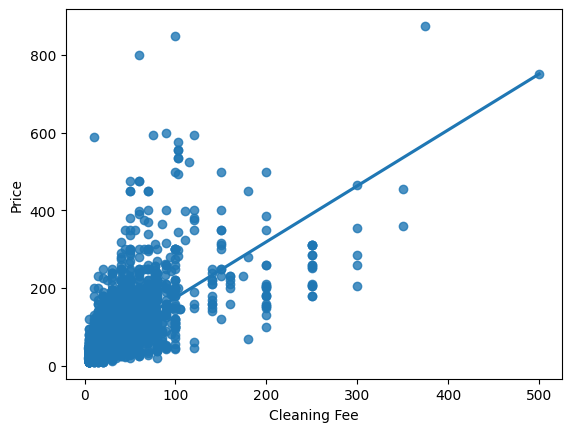

In [21]:
# Realizo un grafico de la tasa de limpieza en relacion al precio.

sns.regplot(data=madrid_df, x="Cleaning Fee", y="Price", ci=None)

####  Según la página de Airbnb, donde dice "Los gastos de limpieza son una de las comisiones que pueden aplicarse a una reserva (excepto en el caso de los alojamientos en China). Este importe ayuda a los anfitriones a mantener sus alojamientos en buen estado y es fundamental tenerlo en cuenta a la hora de adoptar una estrategia de precios eficaz."

#### Teniendo en cuenta la relacion lineal del precio con los gastos de limpieza, como los gastos de limpieza pueden aplicarse a una reserva, voy a considerar que los valores nulos seran 0 ya que el anfitrion no ha puesto tasa de limpieza.

#### https://www.airbnb.es/help/article/58

In [22]:
# Asigno los valores nulos de Cleaning Fee a 0

madrid_df['Cleaning Fee'] = madrid_df['Cleaning Fee'].fillna(0)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13323 non-null  object 
 1   Neighbourhood Group Cleansed  13323 non-null  object 
 2   Property Type                 13323 non-null  object 
 3   Room Type                     13323 non-null  object 
 4   Accommodates                  13323 non-null  int64  
 5   Bathrooms                     13274 non-null  float64
 6   Bedrooms                      13300 non-null  float64
 7   Beds                          13274 non-null  float64
 8   Bed Type                      13323 non-null  object 
 9   Price                         13314 non-null  float64
 10  Security Deposit              5650 non-null   float64
 11  Cleaning Fee                  13323 non-null  float64
 12  Guests Included               13323 non-null  int64  
 13  Extra

#### Considerando la misma información de la pagina oficial de Airbnb, "Los anfitriones no pueden cobrar una fianza a los huéspedes a través de nuestro Centro de resoluciones ni fuera de la plataforma de Airbnb. Lo que hacemos es informar a los viajeros cuando hacen la reserva de que podrían aplicarse cargos en su método de pago si causan daños durante la estancia. 

#### No obstante, hay una excepción: los anfitriones que gestionan sus anuncios con un software conectado a la API pueden establecer una fianza utilizando nuestra función de comisiones que se abonan fuera de la plataforma. Si un anfitrión ha configurado esta opción, los requisitos de la fianza se comunicarán con claridad durante el proceso de reserva

#### https://www.airbnb.es/help/article/140

<Axes: xlabel='Security Deposit', ylabel='Price'>

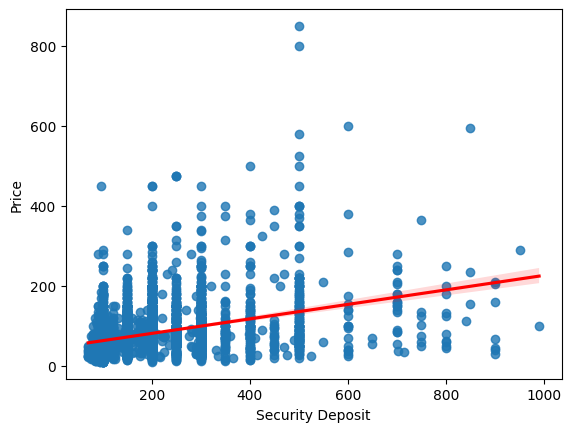

In [23]:
sns.regplot(data=madrid_df, x="Security Deposit", y="Price", ci=None)

#### Observando la grafica, viendo tantos valores puestos aleatoriamente, viendo que hay muchos precios de deposito son elevados en relación a los precios de alojamiento, y con la confirmaciónn de que Airbnb no cobra deposito de seguro a no ser que sea mediante una API. Sumado a la cantidad elevada de nulos, condidero eliminar la variable. 

In [24]:
madrid_df = madrid_df.drop(['Security Deposit'], axis=1)

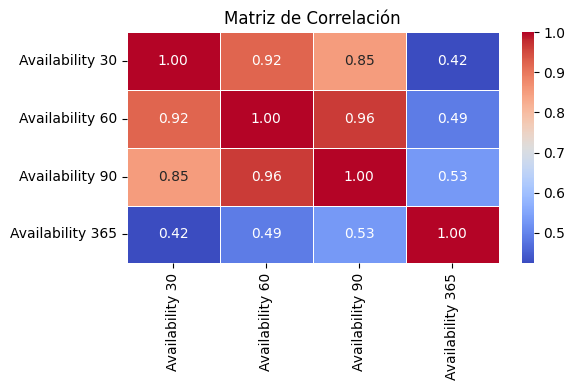

In [25]:
# Genero la matriz de correlacion para analizar las variables.
corrA = madrid_df[['Availability 30','Availability 60','Availability 90','Availability 365']].corr()

plt.figure(figsize=(6, 3))
sns.heatmap(corrA, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#### Considero que hay una alta correlacion entre Availability 30, Availability 60 y Availability 90, por lo que solo me quedare con Availability 90 y 365.

In [26]:
madrid_df = madrid_df.drop(['Availability 30','Availability 60'], axis=1)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13323 non-null  object 
 1   Neighbourhood Group Cleansed  13323 non-null  object 
 2   Property Type                 13323 non-null  object 
 3   Room Type                     13323 non-null  object 
 4   Accommodates                  13323 non-null  int64  
 5   Bathrooms                     13274 non-null  float64
 6   Bedrooms                      13300 non-null  float64
 7   Beds                          13274 non-null  float64
 8   Bed Type                      13323 non-null  object 
 9   Price                         13314 non-null  float64
 10  Cleaning Fee                  13323 non-null  float64
 11  Guests Included               13323 non-null  int64  
 12  Extra People                  13323 non-null  int64  
 13  Minim

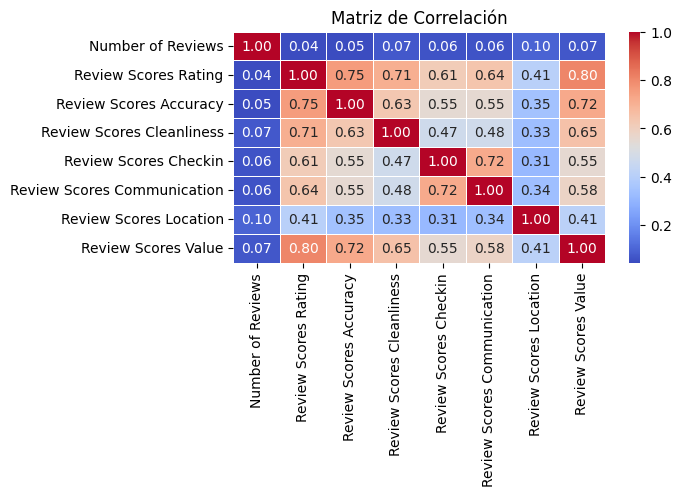

In [27]:
# Genero la matriz de correlacion para analizar las variables.
corrR = madrid_df[['Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin'
                   ,'Review Scores Communication','Review Scores Location','Review Scores Value']].corr()

plt.figure(figsize=(6, 3))
sns.heatmap(corrR, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

<Axes: xlabel='Number of Reviews', ylabel='Price'>

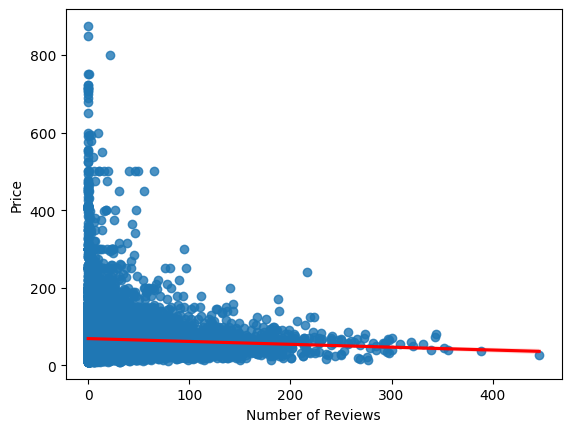

In [28]:
sns.regplot(data=madrid_df, x="Number of Reviews", y="Price",  line_kws=dict(color="r"))

#### Vemos como Number of Reviews no tiene relacion con las demas variables de reviews y que la relacion con el precio es que a mas precio, menos opiniones, podria considerarse que tienen menos Reviews porque se alquilan menos que las de precios mas baratos.

<Axes: xlabel='Review Scores Location', ylabel='Price'>

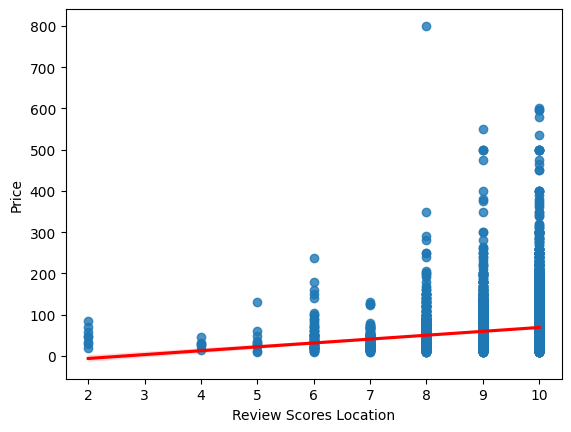

In [29]:
sns.regplot(data=madrid_df, x="Review Scores Location", y="Price", line_kws=dict(color="r"))

#### Considerando la matriz de correlacion de las Reviews me quedare con las variables:
#### Number of Reviews por su relacion con el precio.
#### Review Scores Rating por la alta correlacion con las demas Reviews.
#### Review Scores Location por la baja correlacion con las demas Reviews, pero con relacion sobre el precio que puede darnos informacion mas adelante.

In [30]:
# Elimino las demas caracteristicas.

madrid_df = madrid_df.drop(['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin'
                   ,'Review Scores Communication','Review Scores Value'], axis=1)
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13323 entries, 40 to 14757
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13323 non-null  object 
 1   Neighbourhood Group Cleansed  13323 non-null  object 
 2   Property Type                 13323 non-null  object 
 3   Room Type                     13323 non-null  object 
 4   Accommodates                  13323 non-null  int64  
 5   Bathrooms                     13274 non-null  float64
 6   Bedrooms                      13300 non-null  float64
 7   Beds                          13274 non-null  float64
 8   Bed Type                      13323 non-null  object 
 9   Price                         13314 non-null  float64
 10  Cleaning Fee                  13323 non-null  float64
 11  Guests Included               13323 non-null  int64  
 12  Extra People                  13323 non-null  int64  
 13  Minim

# Dividimos en train/test.

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(madrid_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train2.csv', sep=';', decimal='.', index=False)
test.to_csv('./test2.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_train = pd.read_csv('./train2.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test2.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (10658, 22)
Dimensiones del dataset de test: (2665, 22)


#### Ahora vamos a analizar Bathrooms, Bedrooms, Beds, Price y ver que podemos hacer con los nulos


In [32]:
# Cuento cuantas filas son en total las de valores nulos.

nulos = df_train[['Price', 'Bathrooms', 'Bedrooms', 'Beds']].isna().any(axis=1)
filasNulas = df_train[nulos]

print("Son",len(filasNulas),"filas con valores nulos")

Son 75 filas con valores nulos


In [33]:
# Calculo que porcentaje de mi Dataframe voy a eliminar para ver si es viable.

porcentaje = (len(filasNulas) / len(df_train) * 100)
porcentaje = round(porcentaje, 2)

print("Eliminaría el", porcentaje, "% de mi Dataframe de Train")

Eliminaría el 0.7 % de mi Dataframe de Train


#### El calculo da un valor el cual considero que no modifica mi analisis, procedo a borrarlas.

In [34]:
df_train.dropna(subset=['Price', 'Bathrooms', 'Bedrooms', 'Beds'], inplace=True)
df_test.dropna(subset=['Price', 'Bathrooms', 'Bedrooms', 'Beds'], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10583 entries, 0 to 10657
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        10583 non-null  object 
 1   Neighbourhood Group Cleansed  10583 non-null  object 
 2   Property Type                 10583 non-null  object 
 3   Room Type                     10583 non-null  object 
 4   Accommodates                  10583 non-null  int64  
 5   Bathrooms                     10583 non-null  float64
 6   Bedrooms                      10583 non-null  float64
 7   Beds                          10583 non-null  float64
 8   Bed Type                      10583 non-null  object 
 9   Price                         10583 non-null  float64
 10  Cleaning Fee                  10583 non-null  float64
 11  Guests Included               10583 non-null  int64  
 12  Extra People                  10583 non-null  int64  
 13  Minimu

### Ahora vamos a codificar las variables categóricas. 

In [35]:
categorical = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean).round().astype(int)
    df_test[c] = df_test[c].map(mean).round().astype(int)
    mean_map[c] = mean

df_train.head()

,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,...,Extra People,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Location,Cancellation Policy,Amenities Sum
0,60,72,68,87,2,1.0,1.0,1.0,68,55.0,...,0,1,1125,19,58,130,92.0,9.0,63,13
1,79,72,68,87,2,1.0,0.0,1.0,68,45.0,...,0,2,1125,11,77,113,89.0,10.0,75,11
2,84,72,68,87,4,1.0,2.0,3.0,68,67.0,...,12,2,1125,22,46,67,90.0,10.0,63,11
3,82,72,68,87,2,1.0,1.0,1.0,68,50.0,...,0,2,60,16,275,24,93.0,10.0,63,14
4,84,72,68,87,8,2.0,3.0,6.0,68,180.0,...,14,3,90,37,312,19,98.0,10.0,62,15


(array([8.000e+00, 0.000e+00, 5.000e+00, 9.000e+00, 0.000e+00, 5.300e+01,
        6.900e+01, 5.530e+02, 2.127e+03, 5.433e+03]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

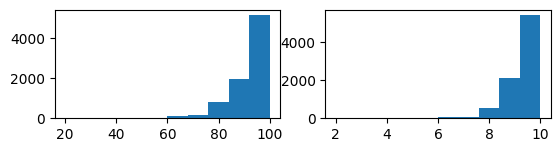

In [36]:
# Viendo los histogramas, considero que realizar una imputacion de la media para estas caracteristicas, Luego vere que hacer con las variables.
plt.subplot(3,2,1)
plt.hist(df_train['Review Scores Rating'])
plt.subplot(3,2,2)
plt.hist(df_train['Review Scores Location'])

In [37]:
# Realizo la imputacion de las dos caracteristicas con valores nulos.

df_train["Review Scores Rating"].fillna(df_train["Review Scores Rating"].mean(), inplace=True)
df_train["Review Scores Location"].fillna(df_train["Review Scores Location"].mean(), inplace=True)

df_test["Review Scores Rating"].fillna(df_test["Review Scores Rating"].mean(), inplace=True)
df_test["Review Scores Location"].fillna(df_test["Review Scores Location"].mean(), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10583 entries, 0 to 10657
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        10583 non-null  int32  
 1   Neighbourhood Group Cleansed  10583 non-null  int32  
 2   Property Type                 10583 non-null  int32  
 3   Room Type                     10583 non-null  int32  
 4   Accommodates                  10583 non-null  int64  
 5   Bathrooms                     10583 non-null  float64
 6   Bedrooms                      10583 non-null  float64
 7   Beds                          10583 non-null  float64
 8   Bed Type                      10583 non-null  int32  
 9   Price                         10583 non-null  float64
 10  Cleaning Fee                  10583 non-null  float64
 11  Guests Included               10583 non-null  int64  
 12  Extra People                  10583 non-null  int64  
 13  Minimu

## Preparamos los datos.

In [38]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn import preprocessing

X_train = df_train.drop('Price', axis=1)  # nos quedamos con el resto
y_train = df_train['Price']  # nos quedamos con la 9º columna, price
feature_names = X_train.columns

X_test = df_test.drop('Price', axis=1)  # nos quedamos con el resto
y_test = df_test['Price']  # nos quedamos con la 9º columna, price
feature_names = X_test.columns

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!+
    
XtestScaled = scaler.transform(X_test) 

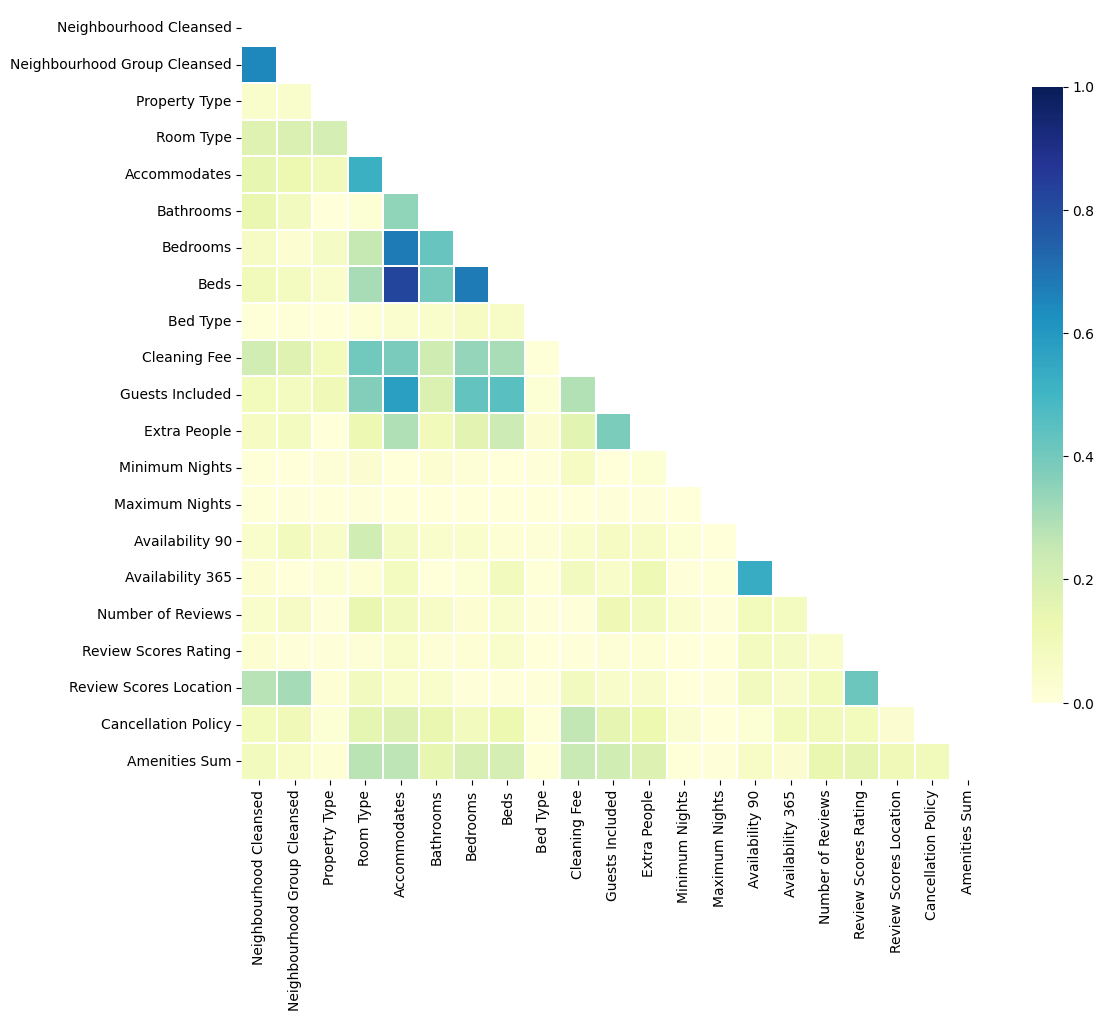

In [39]:
# Creo la matriz de correlacion con todas las variables para lograr mas informacion
corrM = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corrM, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

#### Cross-Validation con Ridge.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END ........................alpha=6.551285568595495e-10; total time=   0.0s
[CV] END ........................alpha=6.551285

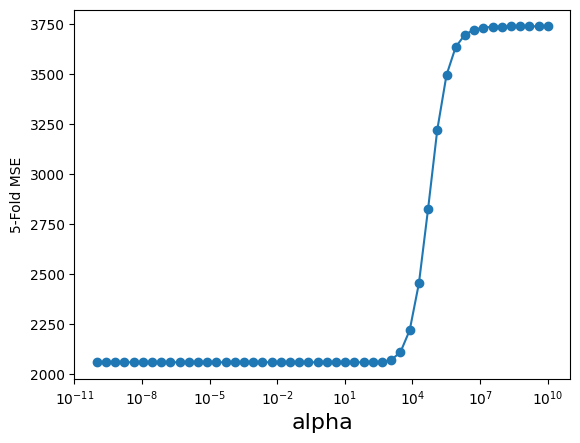

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-10,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Ridge (train): 2.04e+03
RMSE Modelo Ridge (train): 45.1
Neighbourhood Cleansed 15.005615083492215
Neighbourhood Group Cleansed -0.7665682452546959
Property Type 0.5398150767259446
Room Type 10.781172407612473
Accommodates 12.788127454570203
Bathrooms 7.268423719170375
Bedrooms 10.887367076741532
Beds -1.9499758127985594
Bed Type 0.6208663955352365
Cleaning Fee 12.337360431275357
Guests Included 1.370932639149383
Extra People -4.577742392032073
Minimum Nights -0.29164076166151814
Maximum Nights -0.08907885004912236
Availability 90 6.550154004403598
Availability 365 0.9751044741320022
Number of Reviews -3.7277755242490223
Review Scores Rating 3.80847663774854
Review Scores Location -0.4848309942508579
Cancellation Policy -2.3190942370866643
Amenities Sum -3.3772131047267377


#### Cross-Validation con Lasso.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END ........................alpha=6.551285568595495e-10; total time=   0.0s
[CV] END ........................alpha=6.551285

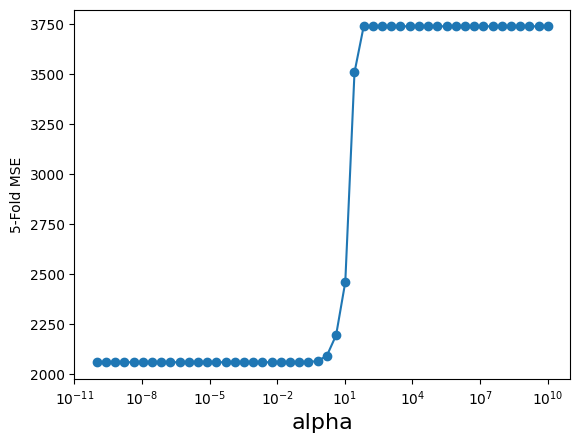

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.04e+03
MSE Modelo Lasso (test) : 2.24e+03
RMSE Modelo Lasso (train): 45.1
RMSE Modelo Lasso (test) : 47.4
Neighbourhood Cleansed 15.063632104168576
Neighbourhood Group Cleansed -0.7869951408727545
Property Type 0.5003332534735736
Room Type 10.787525713833746
Accommodates 12.890361842002513
Bathrooms 7.251983504947372
Bedrooms 10.921693481290871
Beds -1.995218574771357
Bed Type 0.5872036516110463
Cleaning Fee 12.36279225652942
Guests Included 1.28102129840121
Extra People -4.566726348781658
Minimum Nights -0.25639271642481437
Maximum Nights -0.05223955366757112
Availability 90 6.594110806328856
Availability 365 0.9117588587107904
Number of Reviews -3.7068390656071712
Review Scores Rating 3.783415060843703
Review Scores Location -0.4540233713749591
Cancellation Policy -2.3078449602454167
Amenities Sum -3.376500585208346


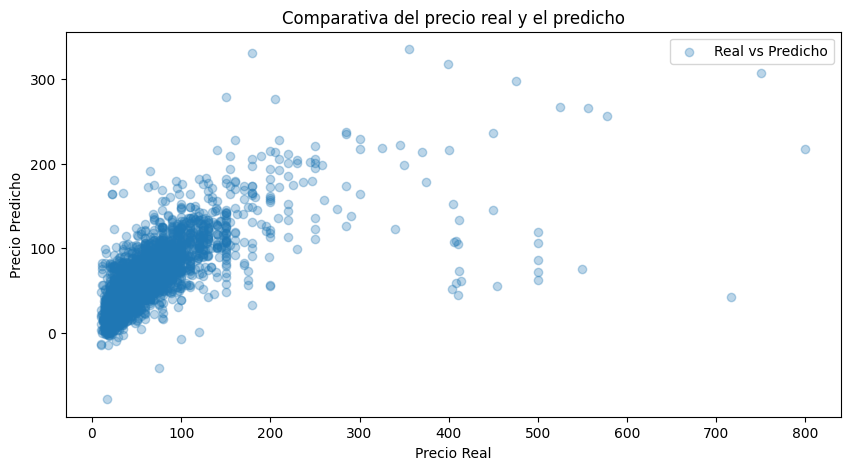

In [44]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ytestLasso, alpha=0.3)
plt.title('Comparativa del precio real y el predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend(['Real vs Predicho'])
plt.show()

#### Método de filtrado(F-test Mutual Info).

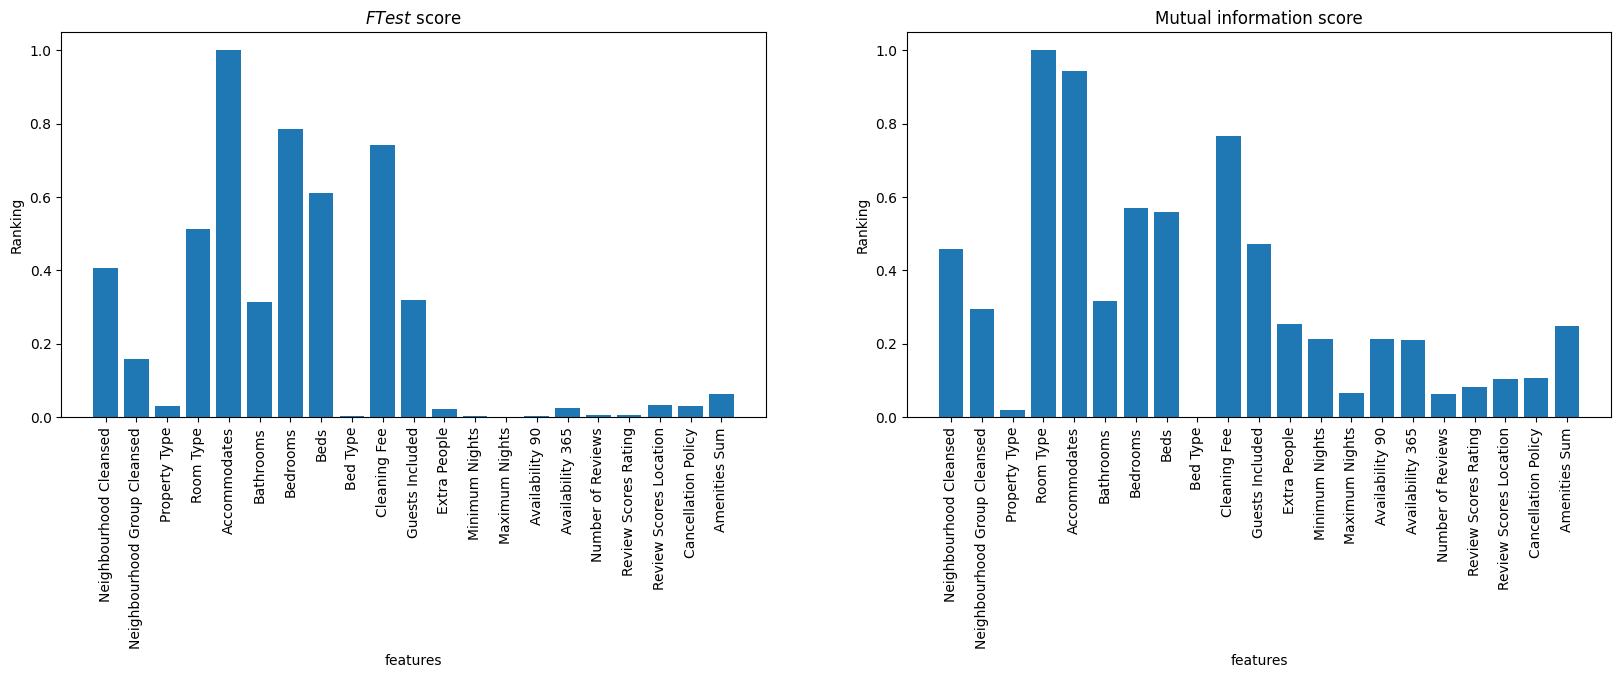

In [45]:
# Calculo Mutual Info y F-test
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

#### Arbol de decisión individual.

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................

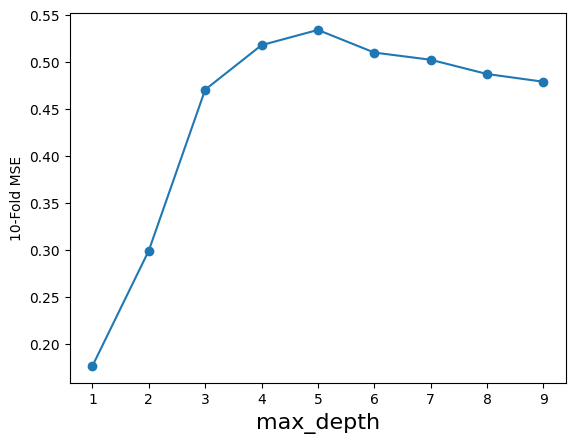

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [47]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6440821717714287
Test:  0.4528016166578148


##### Importancia de variables con arboles

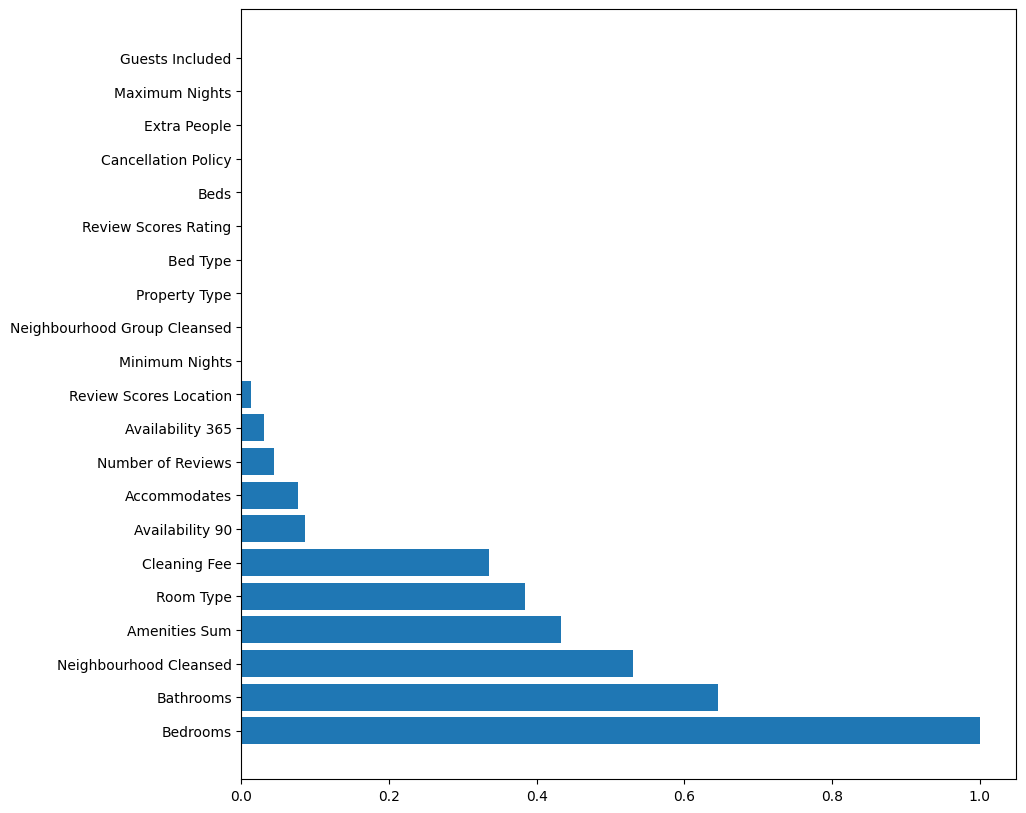

In [48]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),X_train.columns[indices])
plt.show()


#### Random Forest

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=1; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.1s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.0s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.5s
[CV] END ........................................max_depth=3; total time=   1.4s
[CV] END .......................................

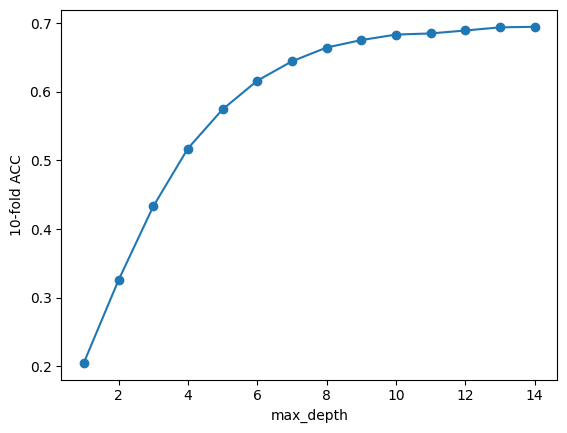

In [49]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [50]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.9116458685536517
Test:  0.6808780495657383


##### Importancia de variables con Random Forest.

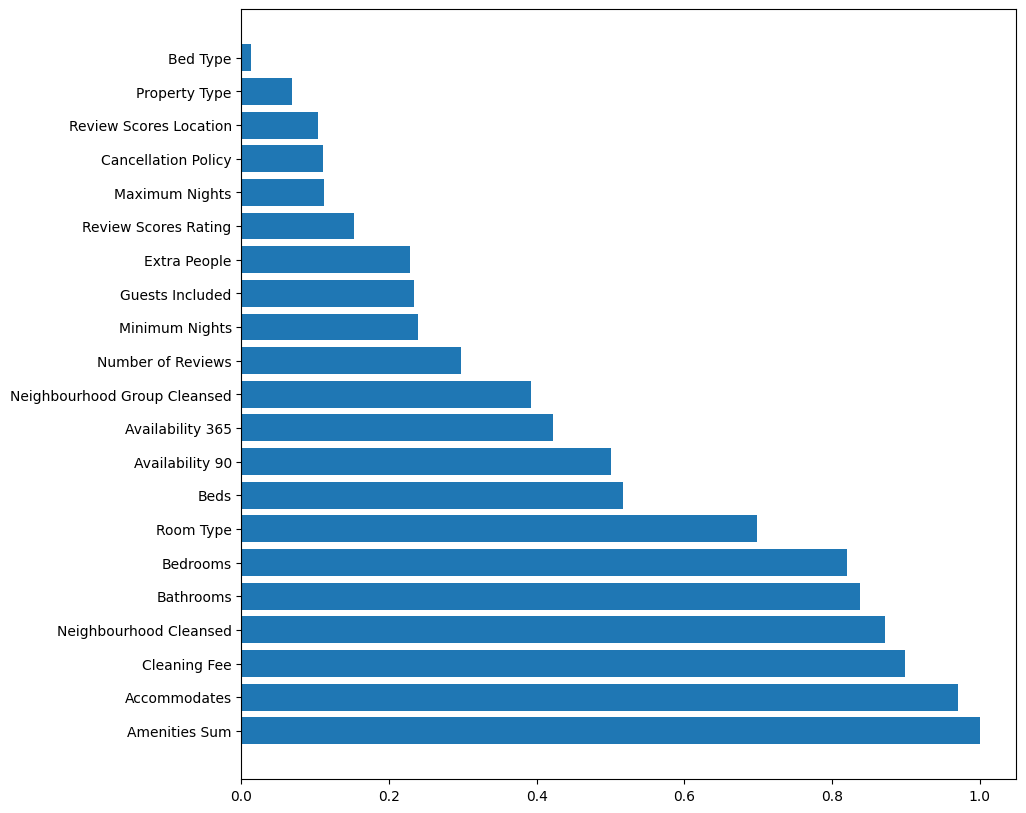

In [51]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),X_train.columns[indices])
plt.show()


#### Bagging Regressor

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ........................base_estimator__max_depth=1; total time=   1.9s
[CV] END ........................base_estimator__max_depth=1; total time=   1.7s
[CV] END ........................base_estimator__max_depth=1; total time=   1.6s
[CV] END ........................base_estimator__max_depth=1; total time=   2.1s
[CV] END ........................base_estimator__max_depth=1; total time=   2.0s
[CV] END ........................base_estimator__max_depth=2; total time=   2.7s
[CV] END ........................base_estimator__max_depth=2; total time=   3.0s
[CV] END ........................base_estimator__max_depth=2; total time=   3.7s
[CV] END ........................base_estimator__max_depth=2; total time=   3.3s
[CV] END ........................base_estimator__max_depth=2; total time=   3.6s
[CV] END ........................base_estimator__max_depth=3; total time=   5.2s
[CV] END ........................base_estimator_

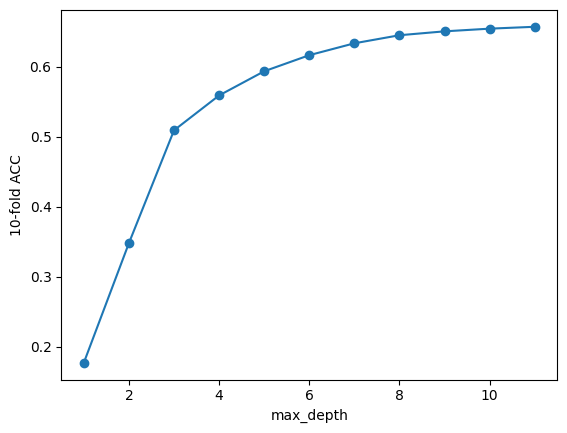

In [52]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,12)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid2 = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid2.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

scores = np.array(grid2.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [53]:
maxDepthOptimo = grid2.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.8733817825242695
Test:  0.653845088808723


##### Importancia de variables con Random Forest.

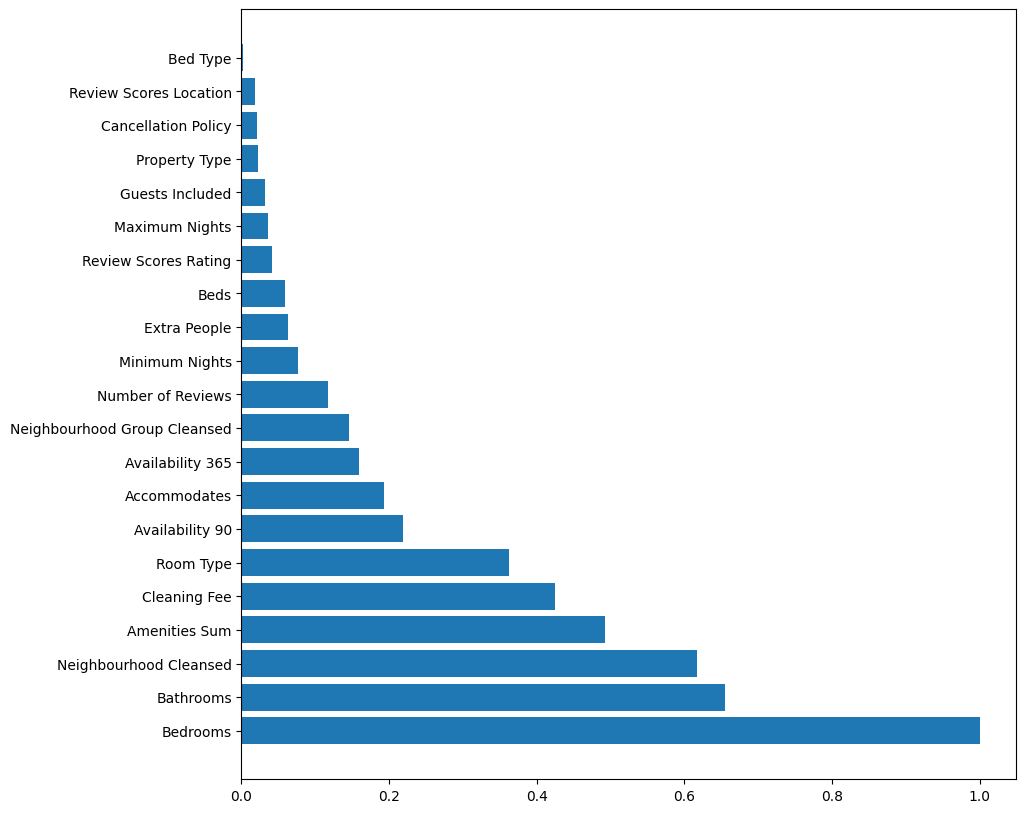

In [54]:
importances = np.mean([tree.feature_importances_ for tree in baggingModel.estimators_], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),X_train.columns[indices])
plt.show()

#### Boosted Tree

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   9.3s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  19.5s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  18.6s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  19.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  27.7s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  26.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  27.0s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  38.3s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  38.9s
[CV] END ...............learning_rate=0.1, n_esti

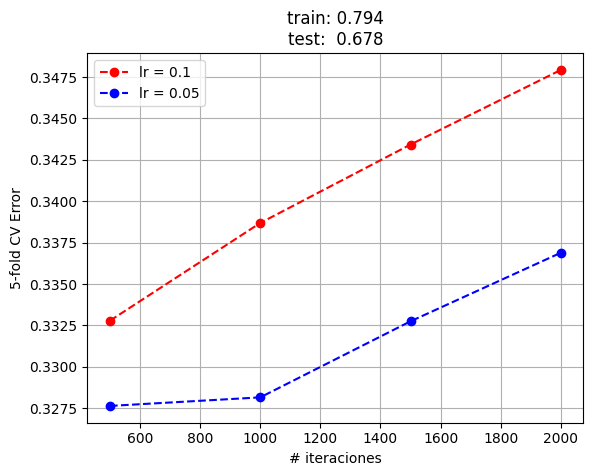

In [56]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [57]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.7936109129375325
Test:  0.6763707520374137


##### Importancia de variables con Random Forest.

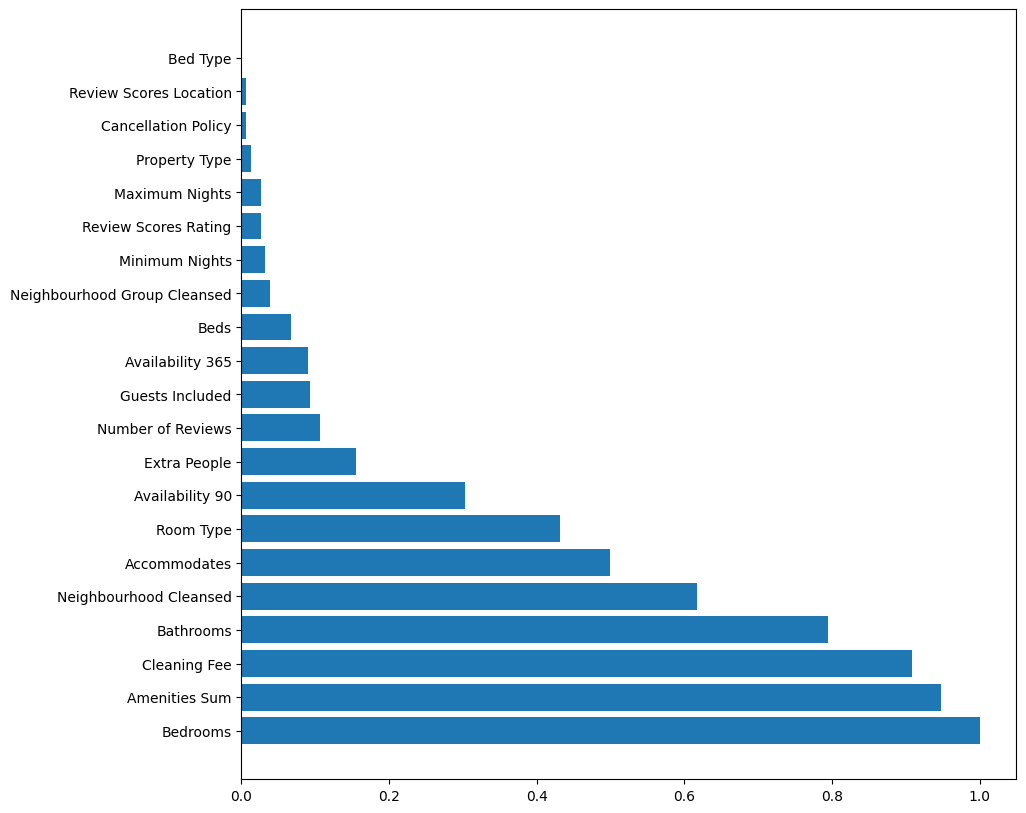

In [58]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

#### Claramente al evaluar test, veo que tengo overfitting. Por lo que tendre que reducir el tamaño de mi dataset ya que no tengo datos nuevos para seguir entrenando mi modelo.
#### Considero que Ridge tiene un alpha demasiado elevado por lo que denota underfitting con lo cual no es concluyo nada. El Árbol de decisión individual no considera muchas características en el modelo (como se observa en la gráfica de las caracteristicas) y los valores de train y test no son buenos.
#### La selección de características las he ido modificando para ver que tal me daban los resultados, sin lograr mejoras considerables en los resultados, por lo que me he quedado con las características que mas influencia tienen en los datos según los análisis realizados.

In [59]:
# Nos quedamos con las caracteristicas que mayor imnportancia tienen
df_train_class = df_train.drop(['Bed Type','Review Scores Location','Cancellation Policy','Property Type','Maximum Nights','Guests Included'
                           ,'Review Scores Rating','Beds','Extra People','Minimum Nights','Number of Reviews','Neighbourhood Group Cleansed'
                           ,'Availability 365'], axis=1)

df_test_class = df_test.drop(['Bed Type','Review Scores Location','Cancellation Policy','Property Type','Maximum Nights','Guests Included'
                           ,'Review Scores Rating','Beds','Extra People','Minimum Nights','Number of Reviews','Neighbourhood Group Cleansed'
                           ,'Availability 365'], axis=1)

### Luego de eliminar ciertas características, vuelvo a analizar los modelos que mayor representación considero que tienen en los datos.

In [60]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn import preprocessing

X_train = df_train_class.drop('Price', axis=1) 
y_train = df_train_class['Price'] 
feature_names = X_train.columns

X_test = df_test_class.drop('Price', axis=1)  
y_test = df_test_class['Price']  
feature_names = X_test.columns

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)  
XtestScaled = scaler.transform(X_test)

#### GridSearch con Lasso

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END .......................alpha=2.5595479226995335e-10; total time=   0.0s
[CV] END ........................alpha=6.551285568595495e-10; total time=   0.0s
[CV] END ........................alpha=6.551285

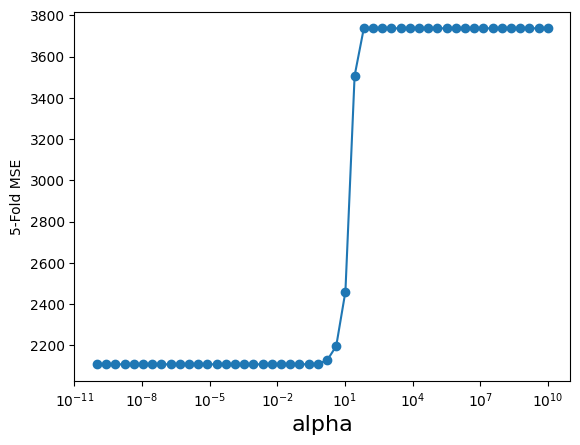

In [61]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [62]:
#from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.09e+03
MSE Modelo Lasso (test) : 2.29e+03
RMSE Modelo Lasso (train): 45.7
RMSE Modelo Lasso (test) : 47.9
Neighbourhood Cleansed 14.385926688734902
Room Type 11.132417199151728
Accommodates 9.164362242353043
Bathrooms 7.178282552686775
Bedrooms 12.219227937425446
Cleaning Fee 11.939965195488917
Availability 90 6.787465982946416
Amenities Sum -3.7931449902761774


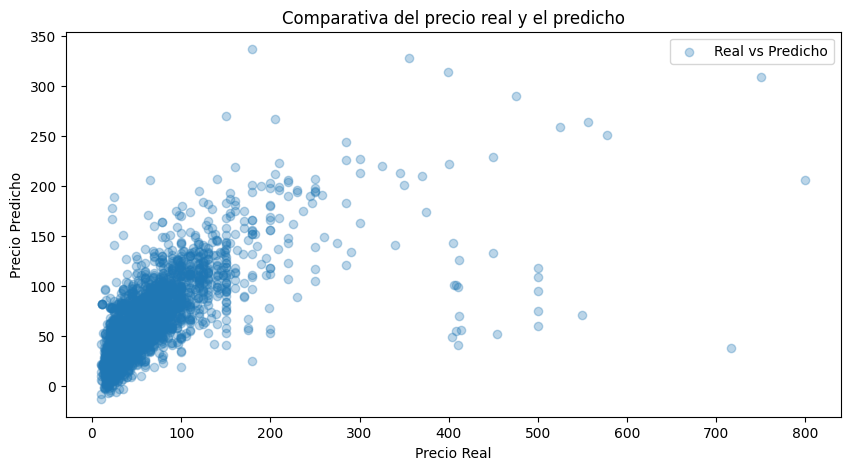

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ytestLasso, alpha=0.3)
plt.title('Comparativa del precio real y el predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend(['Real vs Predicho'])
plt.show()

#### Random Forest.

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.8s
[CV] END .......................................

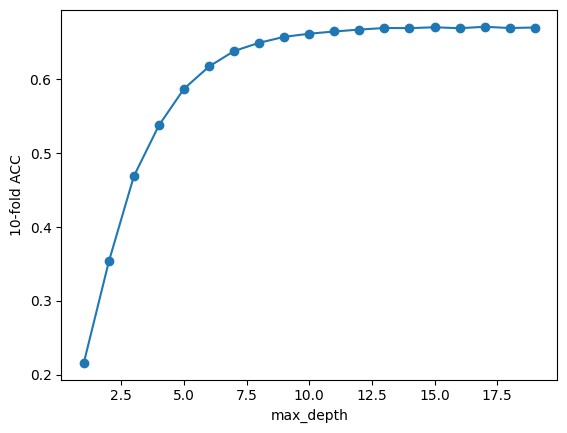

In [64]:
#from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200 ,min_samples_split=5, min_samples_leaf=2, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [65]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

ytrainRF = randomForest.predict(X_train)
ytestRF  = randomForest.predict(X_test)

mseTrainModelRF = mean_squared_error(y_train,ytrainRF)
mseTestModelRF = mean_squared_error(y_test,ytestRF)

print('MSE Modelo Random Forest (train): %0.3g' % mseTrainModelRF)
print('MSE Modelo Random Forest (test) : %0.3g' % mseTestModelRF)

print('RMSE Modelo Random Forest (train): %0.3g' % np.sqrt(mseTrainModelRF))
print('RMSE Modelo Random Forest (test) : %0.3g' % np.sqrt(mseTestModelRF))


Train:  0.9255104074137323
Test:  0.6366636538929173
MSE Modelo Random Forest (train): 278
MSE Modelo Random Forest (test) : 1.49e+03
RMSE Modelo Random Forest (train): 16.7
RMSE Modelo Random Forest (test) : 38.6


#### Gráfico de residuos

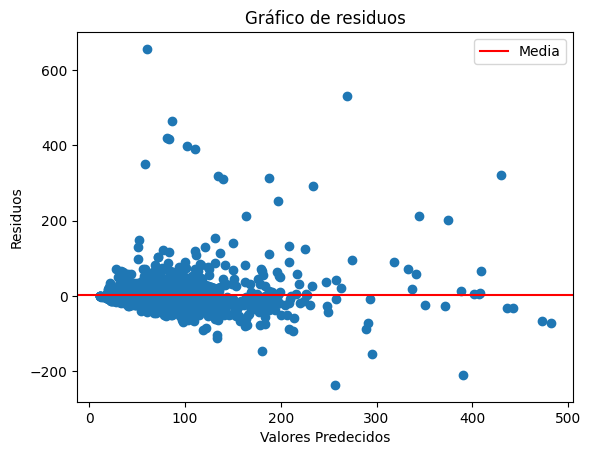

In [81]:
y_pred = randomForest.predict(X_test)
residuos = y_test - ytestRF

plt.scatter(y_pred, residuos)
plt.axhline(y=residuos.mean(), color='red', label='Media')
plt.xlabel('Valores Predecidos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.legend()
plt.show()

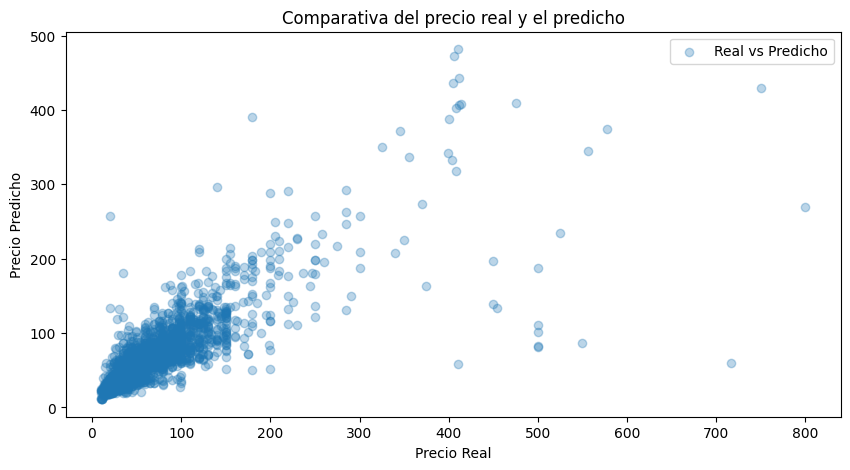

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ytestRF, alpha=0.3)
plt.title('Comparativa del precio real y el predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend(['Real vs Predicho'])
plt.show()

#### Bagging Regressor

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ........................base_estimator__max_depth=1; total time=   2.0s
[CV] END ........................base_estimator__max_depth=1; total time=   2.0s
[CV] END ........................base_estimator__max_depth=1; total time=   2.0s
[CV] END ........................base_estimator__max_depth=1; total time=   1.8s
[CV] END ........................base_estimator__max_depth=1; total time=   1.7s
[CV] END ........................base_estimator__max_depth=2; total time=   1.7s
[CV] END ........................base_estimator__max_depth=2; total time=   1.8s
[CV] END ........................base_estimator__max_depth=2; total time=   2.1s
[CV] END ........................base_estimator__max_depth=2; total time=   1.9s
[CV] END ........................base_estimator__max_depth=2; total time=   1.9s
[CV] END ........................base_estimator__max_depth=3; total time=   2.2s
[CV] END ........................base_estimator_

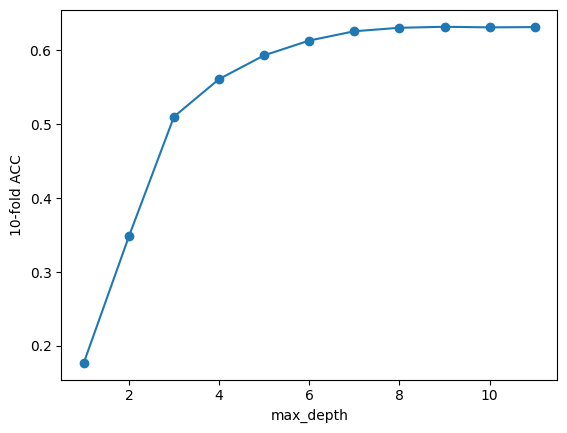

In [68]:
maxDepth = range(1,12)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid2 = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid2.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

scores = np.array(grid2.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [69]:
maxDepthOptimo = grid2.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

ytrainBG = baggingModel.predict(X_train)
ytestBG = baggingModel.predict(X_test)

mseTrainModelBG = mean_squared_error(y_train,ytrainBG)
mseTestModelBG = mean_squared_error(y_test,ytestBG)

print('MSE Modelo Bagging Model (train): %0.3g' % mseTrainModelBG)
print('MSE Modelo Bagging Model (test) : %0.3g' % mseTestModelBG)

print('RMSE Modelo Bagging Model (train): %0.3g' % np.sqrt(mseTrainModelBG))
print('RMSE Modelo Bagging Model (test) : %0.3g' % np.sqrt(mseTestModelBG))

Train:  0.8136045847196445
Test:  0.6134381523057514
MSE Modelo Bagging Model (train): 696
MSE Modelo Bagging Model (test) : 1.58e+03
RMSE Modelo Bagging Model (train): 26.4
RMSE Modelo Bagging Model (test) : 39.8


#### Boosted Tree

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.2s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  10.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  10.6s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  14.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  13.2s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.1s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  18.2s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  20.1s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  20.6s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   9.8s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  10.3s
[CV] END ..............learning_rate=0.05, n_esti

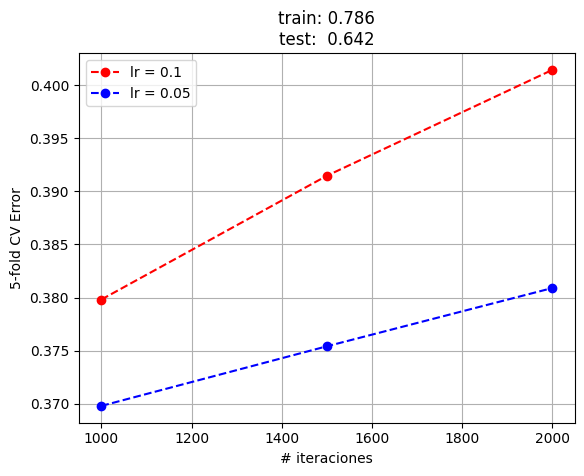

In [71]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [72]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

ytrainBT = bt.predict(X_train)
ytestBT = bt.predict(X_test)

mseTrainModelBT = mean_squared_error(y_train,ytrainBT)
mseTestModelBT = mean_squared_error(y_test,ytestBT)

print('MSE Modelo Boosting Regressor (train): %0.3g' % mseTrainModelBT)
print('MSE Modelo Boosting Regressor (test) : %0.3g' % mseTestModelBT)

print('RMSE Modelo Boosting Regressor (train): %0.3g' % np.sqrt(mseTrainModelBT))
print('RMSE Modelo Boosting Regressor (test) : %0.3g' % np.sqrt(mseTestModelBT))

Train:  0.7856193228951303
Test:  0.641059182577042
MSE Modelo Boosting Regressor (train): 801
MSE Modelo Boosting Regressor (test) : 1.47e+03
RMSE Modelo Boosting Regressor (train): 28.3
RMSE Modelo Boosting Regressor (test) : 38.3


## PIPELINE

In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(madrid_df, test_size=0.2, shuffle=True, random_state=0)

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# Cargamos los dataset 
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Eliminamos los NAs en las columnas seleccionadas
df_train.dropna(subset=['Price', 'Bathrooms', 'Bedrooms', 'Beds'], inplace=True)
df_test.dropna(subset=['Price', 'Bathrooms', 'Bedrooms', 'Beds'], inplace=True)

# Codificamos las variables categóricas en train/test
categorical = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean).round().astype(int)
    df_test[c] = df_test[c].map(mean).round().astype(int)
    mean_map[c] = mean

# Realizo la imputacion de las dos caracteristicas con valores nulos.
df_train["Review Scores Rating"].fillna(df_train["Review Scores Rating"].mean(), inplace=True)
df_train["Review Scores Location"].fillna(df_train["Review Scores Location"].mean(), inplace=True)

df_test["Review Scores Rating"].fillna(df_test["Review Scores Rating"].mean(), inplace=True)
df_test["Review Scores Location"].fillna(df_test["Review Scores Location"].mean(), inplace=True)

# Nos quedamos con las caracteristicas que mayor imnportancia tienen
df_train_class = df_train.drop(['Bed Type','Review Scores Location','Cancellation Policy','Property Type','Maximum Nights','Guests Included'
                           ,'Review Scores Rating','Extra People','Beds','Minimum Nights','Number of Reviews','Neighbourhood Group Cleansed'
                           ,'Availability 365'], axis=1)

df_test_class = df_test.drop(['Bed Type','Review Scores Location','Cancellation Policy','Property Type','Maximum Nights','Guests Included'
                           ,'Review Scores Rating','Extra People','Beds','Minimum Nights','Number of Reviews','Neighbourhood Group Cleansed'
                           ,'Availability 365'], axis=1)

# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn import preprocessing

X_train = df_train_class.drop('Price', axis=1)  
y_train = df_train_class['Price']  
feature_names = X_train.columns

X_test = df_test_class.drop('Price', axis=1)  
y_test = df_test_class['Price']  
feature_names = X_test.columns

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)   
XtestScaled = scaler.transform(X_test) 

from sklearn.ensemble import GradientBoostingRegressor
Niterations = 1000
learningRate = 0.05

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=learningRate, n_estimators=Niterations)
bt.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, random_state=0)

In [84]:

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

ytrainBT = bt.predict(X_train)
ytestBT = bt.predict(X_test)

mseTrainModelBT = mean_squared_error(y_train,ytrainBT)
mseTestModelBT = mean_squared_error(y_test,ytestBT)

print('MSE Modelo Boosted Tree (train): %0.3g' % mseTrainModelBT)
print('MSE Modelo Boosted Tree (test) : %0.3g' % mseTestModelBT)

print('RMSE Modelo Boosted Tree (train): %0.3g' % np.sqrt(mseTrainModelBT))
print('RMSE Modelo Boosted Tree (test) : %0.3g' % np.sqrt(mseTestModelBT))

Train:  0.7856193228951303
Test:  0.6417198305355477
MSE Modelo Boosted Tree (train): 801
MSE Modelo Boosted Tree (test) : 1.47e+03
RMSE Modelo Boosted Tree (train): 28.3
RMSE Modelo Boosted Tree (test) : 38.3


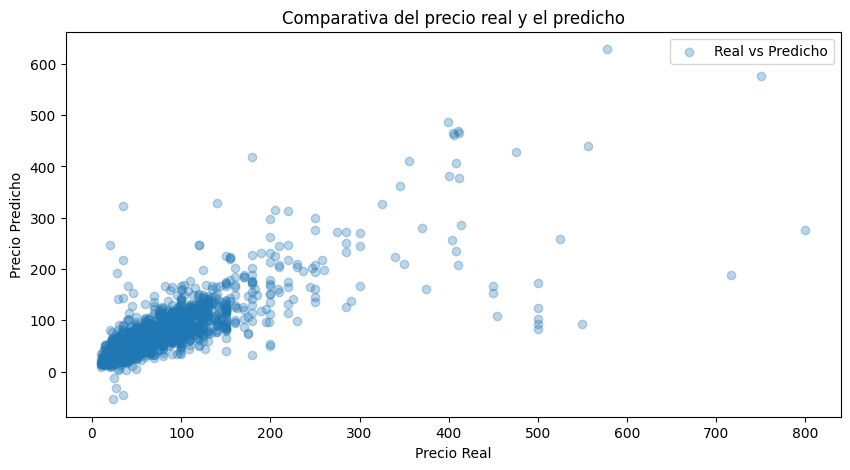

In [86]:
# Grafico EL precio real y el predicho
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ytestBT, alpha=0.3)
plt.title('Comparativa del precio real y el predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend(['Real vs Predicho'])
plt.show()

### Luego de realizar muchas pruebas de modelos, modificación de las variables en cada modelo, no logro llegar a un modelo que me de unos resultados considerables en su aprendizaje.
### Me he quedado con el modelo que menos diferencia entre train y test encuentro, es el Boosting Regressor con un Learning Rate de 0.05 y 1000 iteraciones y una profundidad de 3.
### Considero que, o bien deberia tener mas datos para seguir entrenando al modelo, o realizar un analisis mas exaustivo de los valores de las características (como se puede observar en la grafica) considerando la variabilidad de los datos reales y predichos.

